## Assignment 4: Obsevational Studies and Applied ML

### Deadline
November 21st,11:59PM

### Important notes

Make sure you push on GitHub your notebook with all the cells already evaluated. Don't forget to add a textual description of your thought process, the assumptions you made, and the solution you implemented. Back up any hypotheses and claims with data, since this is an important aspect of the course. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the data files necessary) in the master branch. If there are multiple notebooks present, we will not grade anything.

Use this legendary link to create your repository: [link](https://classroom.github.com/g/YXtsr0QK)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [6]:
data_folder = './data/'
COUNTY_DATA_PATH = "./data/acs2015_county_data.csv"
AAC_INTAKES_OUTCOMES = "./data/aac_intakes_outcomes.csv"

## Task 1: Boosting the economy by incentivizing self-employment

Assume the biggest priority of the local government in 2018 is to increase per-capita income. To do so, the officials plan to adopt a strategy for incentivizing self-employment through a series of campaigns, educational programs, and dedicated funds.

Since it is unethical and impossible in this setting to run a controlled experiment involving citizens (e.g., fire employees and force them to self-employ), the officials have asked you, the data scientist, to establish the effect of self-employment on the economy, relying on observational data.

**A)** You will be working with the full US 2015 census dataset (acs2015_county_data.csv, available at https://www.kaggle.com/muonneutrino/us-census-demographic-data#acs2015_county_data.csv). Using suitable methods, determine and quantify the dependency between the percentage of self-employed citizens and per capita income across all 3,212 US counties. Do citizens in counties that have a higher percentage of self-employed people earn more per capita?

**B)** The pilot program will involve all counties within a limited set of three US states. Set A includes Wisconsin, Tennessee, and  Minnesota. Quantify the dependency of per-capita income on self-employment rates across all the counties in set A.

**C)** In which state within set A is the observed effect of self-employment on per-capita income the strongest?

**D)** Set B includes New Jersey, Kansas, and Rhode Island. Repeat the analysis from steps B and C above, but now for set B. In which of the two sets A and B (if any) would you recommend incentivizing self-employment? Explain your reasoning.

Hint: It is useful to add a notion of confidence to your results and explore the data visually. You are allowed to use the SciPy library.

## Task 2: All you need is love… And a dog!

Here we are going to build a classifier to predict whether an animal from an animal shelter will be adopted or not (aac_intakes_outcomes.csv, available at: https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes/version/1#aac_intakes_outcomes.csv). You will be working with the following features:

1. *animal_type:* Type of animal. May be one of 'cat', 'dog', 'bird', etc.
2. *intake_year:* Year of intake
3. *intake_condition:* The intake condition of the animal. Can be one of 'normal', 'injured', 'sick', etc.
4. *intake_number:* The intake number denoting the number of occurrences the animal has been brought into the shelter. Values higher than 1 indicate the animal has been taken into the shelter on more than one occasion.
5. *intake_type:* The type of intake, for example, 'stray', 'owner surrender', etc.
6. *sex_upon_intake:* The gender of the animal and if it has been spayed or neutered at the time of intake
7. *age_upon\_intake_(years):* The age of the animal upon intake represented in years
8. *time_in_shelter_days:* Numeric value denoting the number of days the animal remained at the shelter from intake to outcome.
9. *sex_upon_outcome:* The gender of the animal and if it has been spayed or neutered at time of outcome
10. *age_upon\_outcome_(years):* The age of the animal upon outcome represented in years
11. *outcome_type:* The outcome type. Can be one of ‘adopted’, ‘transferred’, etc.

You are allowed to use the scikit-learn library to implement your classifiers.

**A) Load the dataset and convert categorical features to a suitable numerical representation (use dummy-variable encoding). Split the data into a training set (80%) and a test set (20%). Pair each feature vector with the corresponding label, i.e., whether the outcome_type is adoption or not. Standardize the values of each feature in the data to have mean 0 and variance 1. The use of external libraries is not permitted in part A, except for numpy and pandas.**

In [163]:
# Load dataset
adopt_df = pd.read_csv(AAC_INTAKES_OUTCOMES)

# Extract the features we will be working with
working_features = ['animal_type', 'intake_year', 'intake_condition', 'intake_number', 'intake_type', 'sex_upon_intake', \
                   'age_upon_intake_(years)', 'time_in_shelter_days', 'sex_upon_outcome', 'age_upon_outcome_(years)', 'outcome_type']

adopt_df = adopt_df[working_features]

# Show features with nan
print("There are {} % of rows that have nan value.".format(len(adopt_df[adopt_df.isnull().any(axis=1)])/len(adopt_df)*100))

# Drop the nan columns
adopt_df = adopt_df.dropna().reset_index(drop=True)

There are 0.013806607089065167 % of rows that have nan value.


We can see that a few rows have nan values. We decide to drop these rows because these nan rows are very few in quantity and dropping them will not affect the final model.

Categorical features include:
- animal_type
- intake_condition
- intake_type
- sex_upon_intake
- sex_upon_outcome
- outcome_type

In [175]:
# Convert to dummy-variable encoding
dummy_features = ['outcome_type', 'animal_type', 'intake_condition', 'intake_type', 'sex_upon_intake', 'sex_upon_outcome']

# Take out outcometype-Adoption and the other dummy variables separately
adopt_dummies = pd.get_dummies(adopt_df[dummy_features[1:]])
outcome_dummies = pd.get_dummies(adopt_df.outcome_type)

# Concat the already-numerical-features with dummies --> full data
adopt_without_dummies = adopt_df.drop(dummy_features, axis=1)
adopt_data = adopt_dummies.merge(adopt_without_dummies, left_index=True, right_index=True)

# All categorical variables should now be replaced by numerical dummy values
adopt_data.head()

,animal_type_Bird,animal_type_Cat,animal_type_Dog,animal_type_Other,intake_condition_Aged,intake_condition_Feral,intake_condition_Injured,intake_condition_Normal,intake_condition_Nursing,intake_condition_Other,...,sex_upon_outcome_Intact Female,sex_upon_outcome_Intact Male,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Unknown,intake_year,intake_number,age_upon_intake_(years),time_in_shelter_days,age_upon_outcome_(years)
0,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,2017,1.0,10.0,0.588194,10.0
1,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,2014,2.0,7.0,1.259722,7.0
2,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,2014,3.0,6.0,1.113889,6.0
3,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,2014,1.0,10.0,4.970139,10.0
4,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,2013,1.0,16.0,0.119444,16.0


In [165]:
def split_data(x, y, ratio=0.8, myseed=1):
    """split the dataset based on the split ratio."""
    # set seed
    np.random.seed(myseed)
    # generate random indices
    num_row = len(y)
    indices = np.random.permutation(num_row)
    index_split = int(np.floor(ratio * num_row))
    index_tr = indices[: index_split]
    index_te = indices[index_split:]
    # create split
    x_tr = x.iloc[index_tr]
    x_te = x.iloc[index_te]
    y_tr = y.iloc[index_tr]
    y_te = y.iloc[index_te]
    return x_tr, x_te, y_tr, y_te

In [178]:
# Standardize the data
adopt_data_std = (adopt_data - adopt_data.mean()) / adopt_data.std()
# Split data into 80-20
x_tr, x_te, y_tr, y_te = split_data(adopt_data_std, outcome_dummies['Adoption'])

print("X (features) and Y (adoption) are paired by their index. \nHere is an example: the animal having the features is adopted ==> outcome_type_Adption: {}".format(y_tr.iloc[0]))
x_tr.head(1)

X (features) and Y (adoption) are paired by their index. 
Here is an example: the animal having the features is adopted ==> outcome_type_Adption: 1


,animal_type_Bird,animal_type_Cat,animal_type_Dog,animal_type_Other,intake_condition_Aged,intake_condition_Feral,intake_condition_Injured,intake_condition_Normal,intake_condition_Nursing,intake_condition_Other,...,sex_upon_outcome_Intact Female,sex_upon_outcome_Intact Male,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Unknown,intake_year,intake_number,age_upon_intake_(years),time_in_shelter_days,age_upon_outcome_(years)
69166,-0.065373,-0.767619,0.869522,-0.242458,-0.063408,-0.034003,-0.229837,0.370493,-0.156943,-0.042997,...,-0.36369,-0.373009,1.34746,-0.687128,-0.305102,1.200104,-0.278015,-0.700148,-0.302612,-0.682143


The above example shows the treated features (with standardizing) of an animal that is actually adopted. The below shows the untreated data of the same animal. The data is standardized since the question asks for standardization of each feature, but actually, standardizing the categorical data (having only 0 or 1) doesn't make much sense. We should only standardize data that we assume have a Gaussian distribution.

In [179]:
print("Here is the original data:")
adopt_df.iloc[69166]

Here is the original data:


animal_type                           Dog
intake_year                          2017
intake_condition                   Normal
intake_number                           1
intake_type                         Stray
sex_upon_intake               Intact Male
age_upon_intake_(years)         0.0821918
time_in_shelter_days              4.14514
sex_upon_outcome            Neutered Male
age_upon_outcome_(years)         0.164384
outcome_type                     Adoption
Name: 69166, dtype: object

**B) Train a logistic regression classifier on your training set. Logistic regression returns probabilities as predictions, so in order to arrive at a binary prediction, you need to put a threshold on the predicted probabilities. For the decision threshold of 0.5, present the performance of your classifier on the test set by displaying the confusion matrix. Based on the confusion matrix, manually calculate accuracy, precision, recall, and F1-score with respect to the positive and the negative class. Vary the value of the threshold in the range from 0 to 1 and visualize the value of accuracy, precision, recall, and F1-score (with respect to both classes) as a function of the threshold. The shelter has a limited capacity and has no other option but to put to sleep animals with a low probability of adoption. What metric (precision, recall, accuracy, or F1-score) and with respect to what class is the most relevant when choosing the threshold in this scenario, and why? Explain your reasoning.**

In [248]:
def confusion_matrix(y_te, y_pred):
    """
    True negative: cm[0,0]  False positive: cm[0,1]
    False negative: cm[1,0] True positive: cm[1,1]
    """
    test_results = pd.DataFrame({'y_pred':y_pred,'y_te':y_te})
    # Get confusion matrix through comparing pred and Y_test
    true_positives = len(test_results[(test_results.y_pred == 1) & (test_results.y_te == 1)])
    true_negatives = len(test_results[(test_results.y_pred == 0) & (test_results.y_te == 0)])
    false_positives = len(test_results[(test_results.y_pred == 1) & (test_results.y_te == 0)])
    false_negatives = len(test_results[(test_results.y_pred == 0) & (test_results.y_te == 1)])
    return np.array([[true_negatives, false_positives], [false_negatives, true_positives]])

def test_scores(x_te, y_te, threshold, model, verbose=False):
    """
    Function to calculate accuracy, precision, recall and F1 score according to specific threshold for 
    positive or negative class
    """
    y_pred = np.where(model.predict_proba(x_te)[:,1] > threshold, 1, 0)
    cm = confusion_matrix(y_te, y_pred)
    
    # Calculate accuracy (same for +ve and -ve class)
    # (true +ve + true -ve / (all))
    accuracy = (cm[1,1] + cm[0,0])/ cm.sum() 
    
    # Calculate precision 
    #(true +ve / (true +ve + false +ve))
    precision_pos = cm[1,1] / float(cm[1,1] + cm[0,1])
    #(true -ve / (true -ve + false -ve))
    precision_neg = cm[0, 0] / float(cm[0,0] + cm[1,0])
    
    # Calculate recall 
    #(true +ve / (true +ve + false -ve))
    recall_pos = cm[1,1] / float(cm[1,1] + cm[1,0])
    #(true -ve / (true -ve + false +ve))
    recall_neg = cm[0,0] / float(cm[0,0] + cm[0,1])
    
    # Calculate F1 score  2*((precision*recall)/(precision+recall))
    F1_pos = 2*(precision_pos*recall_pos) / (precision_pos + recall_pos)
    F1_neg = 2*(precision_neg*recall_neg) / (precision_neg + recall_neg)
    
    if verbose:
        print("accuracy: ", accuracy)
        print("precision (+): ", precision_pos)
        print("precision (-): ", precision_neg)
        print("recall (+): ", recall_pos)
        print("recall (-): ", recall_neg)
        print("f1_score (+): ", F1_pos)
        print("f1_score (-): ", F1_neg)
    return accuracy, precision_pos, precision_neg, recall_pos, recall_neg, F1_pos, F1_neg

In [246]:
# Create logistic model and predict y-labels. By default the decision threshold is 0.5.
logistic = LogisticRegression(solver='lbfgs')
model = logistic.fit(x_tr, y_tr)
y_pred = model.predict(x_te)

# Get confusion matrix
cm = confusion_matrix(y_te, y_pred)
cm

array([[7664, 1576],
       [1258, 5435]])

In [249]:
accuracy, precision_pos, precision_neg, recall_pos, recall_neg, F1_pos, F1_neg = test_scores(x_te, y_te, 0.5, model, True)

accuracy:  0.8221301700872403
precision (+):  0.7752103836827842
precision (-):  0.8590002241649854
recall (+):  0.8120424323920514
recall (-):  0.8294372294372294
f1_score (+):  0.7931990659661412
f1_score (-):  0.8439599163087765


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


Text(0.5,1,'Negative metrics')

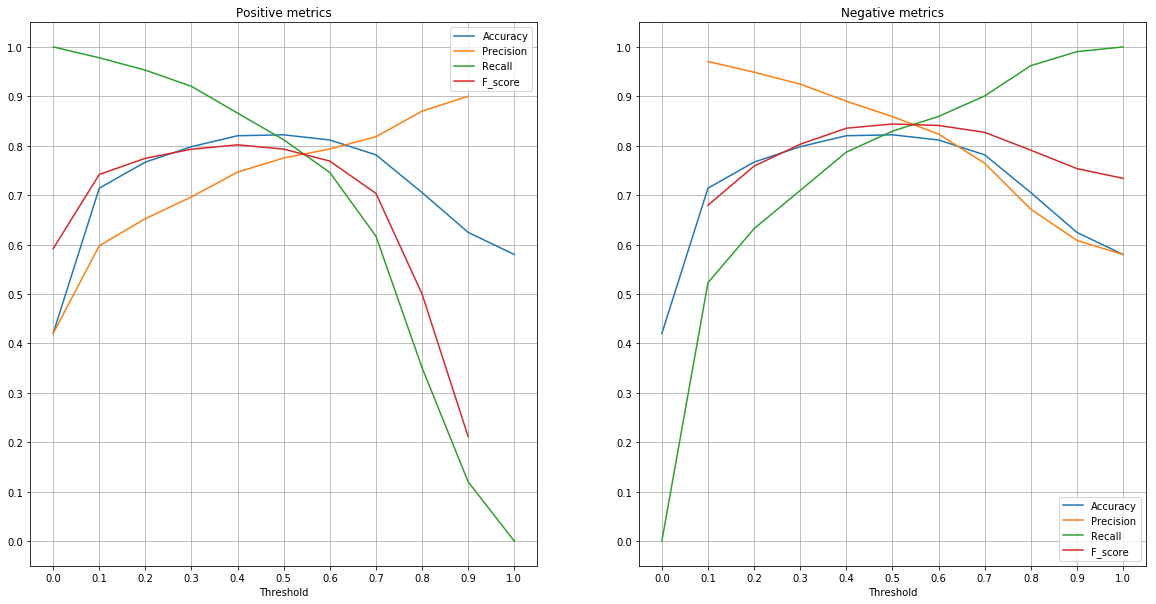

In [183]:
# Test with threshold from 0 to 1
accuracies = []
precisions_pos = []
recalls_pos = []
F1s_pos = []
precisions_neg = []
recalls_neg = []
F1s_neg = []
thresholds = np.arange(0, 11, 1) / 10
for threshold in thresholds:
    accuracy, precision_pos, precision_neg, recall_pos, recall_neg, F1_pos, F1_neg = test_scores(x_te, y_te, threshold)
    accuracies.append(accuracy)
    precisions_pos.append(precision_pos)
    recalls_pos.append(recall_pos)
    F1s_pos.append(F1_pos)
    precisions_neg.append(precision_neg)
    recalls_neg.append(recall_neg)
    F1s_neg.append(F1_neg)
    
# Plot 
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.grid(True)
plt.xticks(thresholds)
plt.yticks(thresholds)
plt.plot(thresholds, accuracies, label="Accuracy")
plt.plot(thresholds, precisions_pos, label="Precision")
plt.plot(thresholds, recalls_pos, label="Recall")
plt.plot(thresholds, F1s_pos, label="F_score")
plt.xlabel("Threshold")
plt.legend(["Accuracy", 'Precision', 'Recall', 'F_score'])
plt.title('Positive metrics')

plt.subplot(1,2,2)
plt.grid(True)
plt.xticks(thresholds)
plt.yticks(thresholds)
plt.plot(thresholds, accuracies, label="Accuracy")
plt.plot(thresholds, precisions_neg, label="Precision")
plt.plot(thresholds, recalls_neg, label="Recall")
plt.plot(thresholds, F1s_neg, label="F_score")
plt.xlabel("Threshold")
plt.legend(["Accuracy", 'Precision', 'Recall', 'F_score'])
plt.title('Negative metrics')

The goal of the shelter should be to minimize the number of animals that are unnecessarily put to sleep. In other words, the goal is to minimize false negatives which would prevent killing animals that would have otherwise been adopted. In this case, negative precision is the most important metric and class when choosing a threshold. The metric negative precision compares the number of accurate unadopted predictions to the total number of unadopted predictions made -- the shelter should maximize this number in order to reduce the chance of unnecessary animals being put to sleep. Based on the graph above, a threshold of ~0.1 would be ideal in achieving the highest negative precision.

**C) Reduce the number of features by selecting the subset of the k best features. Use greedy backward selection to iteratively remove features. Evaluate performance and visualize the result using 5-fold cross-validation on the training set as a function of k, where k = 1, 5, 10, 15, 20, 25, 30. Choose the optimal k and justify your choice. Interpret the top-k features and their impact on the probability of adoption.**

We will use accuracy to evaluation the performance of the model. We fix the threshold to 0.5, since in the graphs above we see that the accuracy is at its maximum when the threshold is 0.5.

In [233]:
logistic = LogisticRegression(solver='lbfgs')

def get_accuracy(tx_tr, ty_tr, tx_te, ty_te, threshold=0.5):
    model = logistic.fit(tx_tr, ty_tr)
    y_pred = np.where(model.predict_proba(tx_te)[:,1] > threshold, 1, 0)
    cm = confusion_matrix(ty_te, y_pred)
    accuracy = (cm[1,1] + cm[0,0])/ cm.sum() 
    return accuracy

def build_k_indices(y, k_fold, seed=1):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval] for k in range(k_fold)]
    return np.array(k_indices)

# 5 fold cross-validation
def cross_validation(y_tr, x_tr, rfc=None, use_rfc=False):
    """perform 5 fold cross_validation"""
    x = x_tr.values
    y = y_tr.values

    k_fold = 5
    accuracies = []
    # split data in k fold
    k_indices = build_k_indices(y_tr, k_fold)
    for k in range(k_fold):
        # get k'th subgroup in test, others in train
        te_indice = k_indices[k]
        tr_indice = k_indices[~(np.arange(k_indices.shape[0]) == k)].reshape(-1)
        # Split into x,y test (1/5) / x,y train (4/5)
        ty_te = y[te_indice]
        ty_tr = y[tr_indice]
        tx_te = x[te_indice]
        tx_tr = x[tr_indice]
        # get accuracy
        if use_rfc:
            accuracy = get_rfc_accuracy(tx_tr, ty_tr, tx_te, ty_te, rfc)
        else:
            accuracy = get_accuracy(tx_tr, ty_tr, tx_te, ty_te)
        accuracies.append(accuracy)
    return sum(accuracies)/len(accuracies)

In [234]:
# At each iteration, the function calculates (using 5-fold cross validation), the accuracy of the training dataset
# minus 1 column and stores this in a dictionary. At the end of each iteration, the dropped column that corresponds
# to the subset with the highest accuracy is dropped from the feature columns. The iteration continues until there
# are only k features left. Finally, it returns k, list of remaining columns, and accuracy of the final data.


def backward_feature_selection(x_tr, y_tr, k_list, col_list, accuracy_list):
    x_train = x_tr.copy()
    k_features = dict()
    k_accuracies = dict()
    # Go through every feature
    for k in range(32, 1, -1):  
        features = list(x_train.columns)
        accuracies = dict()
        print("Reducing {} features to {}...".format(k, k-1))
        # Go through all the features and test for accuracy without the feature
        for i, feature in enumerate(features):
            data_without_col = x_train.loc[:, x_train.columns != feature]
            accuracy = cross_validation(y_tr, data_without_col)
            accuracies[feature] = accuracy
            print("Accuracy without {}: {}".format(feature, accuracy))
        # Record 
        nb_features = k-1
        if (nb_features in k_list):
            k_accuracy = cross_validation(y_tr, x_train)
            k_features[nb_features] = list(x_train.columns)
            k_accuracies[nb_features] = k_accuracy
            print("Recording for {}".format(nb_features))
        # min_accuracy_col: col without which the accuracy is the highest
        min_accuracy_col = max(accuracies, key=accuracies.get)
        x_train = x_train.drop(min_accuracy_col, axis=1)
        print("Dropping the min_accuracy_col {}, best accuracy for {} features: {} ...\n".format(min_accuracy_col, nb_features, accuracies[min_accuracy_col]))
    return x_train, k_accuracies, k_features

In [235]:
k_list = [1, 5, 10, 15, 20, 25, 30]
col_list = []
accuracy_list = []

x_train, k_accuracies, k_features = backward_feature_selection(x_tr, y_tr, k_list, col_list, accuracy_list)

Reducing 32 features to 31...
Accuracy without animal_type_Bird: 0.8215770890545313
Accuracy without animal_type_Cat: 0.8216241663397412
Accuracy without animal_type_Dog: 0.8216084739113378
Accuracy without animal_type_Other: 0.8216084739113378
Accuracy without intake_condition_Aged: 0.8216241663397412
Accuracy without intake_condition_Feral: 0.8216084739113378
Accuracy without intake_condition_Injured: 0.8216241663397412
Accuracy without intake_condition_Normal: 0.8215927814829346
Accuracy without intake_condition_Nursing: 0.8216241663397412
Accuracy without intake_condition_Other: 0.8215927814829346
Accuracy without intake_condition_Pregnant: 0.8216241663397412
Accuracy without intake_condition_Sick: 0.8216084739113378
Accuracy without intake_type_Euthanasia Request: 0.821561396626128
Accuracy without intake_type_Owner Surrender: 0.8216084739113378
Accuracy without intake_type_Public Assist: 0.8215770890545313
Accuracy without intake_type_Stray: 0.8216084739113378
Accuracy without in

Accuracy without intake_condition_Injured: 0.8217967830521774
Accuracy without intake_condition_Normal: 0.8217810906237741
Accuracy without intake_condition_Nursing: 0.8218124754805807
Accuracy without intake_condition_Other: 0.8217967830521774
Accuracy without intake_condition_Pregnant: 0.8217967830521774
Accuracy without intake_condition_Sick: 0.8217967830521774
Accuracy without intake_type_Euthanasia Request: 0.8217967830521774
Accuracy without intake_type_Owner Surrender: 0.8218124754805807
Accuracy without intake_type_Public Assist: 0.8217967830521774
Accuracy without intake_type_Stray: 0.8217967830521774
Accuracy without intake_type_Wildlife: 0.8217967830521774
Accuracy without sex_upon_intake_Intact Female: 0.8218124754805807
Accuracy without sex_upon_intake_Intact Male: 0.8217967830521774
Accuracy without sex_upon_intake_Neutered Male: 0.8217810906237741
Accuracy without sex_upon_intake_Spayed Female: 0.8217810906237741
Accuracy without sex_upon_intake_Unknown: 0.82181247548058

Accuracy without age_upon_intake_(years): 0.8217497057669675
Accuracy without time_in_shelter_days: 0.8107963907414673
Accuracy without age_upon_outcome_(years): 0.821671243624951
Dropping the min_accuracy_col sex_upon_intake_Unknown, best accuracy for 23 features: 0.8218124754805807 ...

Reducing 23 features to 22...
Accuracy without animal_type_Other: 0.8215457041977245
Accuracy without intake_condition_Aged: 0.8213417026284817
Accuracy without intake_condition_Injured: 0.8214986269125146
Accuracy without intake_condition_Normal: 0.8215770890545311
Accuracy without intake_condition_Nursing: 0.8215613966261278
Accuracy without intake_condition_Other: 0.821734013338564
Accuracy without intake_condition_Pregnant: 0.8216555511965475
Accuracy without intake_condition_Sick: 0.8215770890545311
Accuracy without intake_type_Euthanasia Request: 0.8214201647704982
Accuracy without intake_type_Public Assist: 0.8071557473519027
Accuracy without intake_type_Stray: 0.8131345625735582
Accuracy witho

Accuracy without sex_upon_outcome_Unknown: 0.792608866222048
Accuracy without intake_year: 0.8193644566496665
Accuracy without intake_number: 0.8213417026284817
Accuracy without time_in_shelter_days: 0.8091329933307179
Accuracy without age_upon_outcome_(years): 0.8198352295017652
Dropping the min_accuracy_col intake_condition_Pregnant, best accuracy for 17 features: 0.821718320910161 ...

Reducing 17 features to 16...
Accuracy without intake_condition_Aged: 0.8216555511965478
Accuracy without intake_condition_Injured: 0.8217026284817577
Accuracy without intake_condition_Normal: 0.8210435464888193
Accuracy without intake_condition_Nursing: 0.8216398587681443
Accuracy without intake_type_Euthanasia Request: 0.8215300117693214
Accuracy without intake_type_Public Assist: 0.8070929776382896
Accuracy without intake_type_Stray: 0.8137936445664966
Accuracy without intake_type_Wildlife: 0.8216398587681445
Accuracy without sex_upon_intake_Neutered Male: 0.8009258532757944
Accuracy without sex_up

Accuracy without intake_type_Stray: 0.8095723813260103
Accuracy without sex_upon_intake_Neutered Male: 0.7970655158885838
Accuracy without sex_upon_intake_Spayed Female: 0.8047391133777954
Accuracy without sex_upon_outcome_Intact Female: 0.7477599058454295
Accuracy without sex_upon_outcome_Intact Male: 0.747257748136524
Accuracy without sex_upon_outcome_Unknown: 0.7347508826990977
Accuracy without time_in_shelter_days: 0.8066692820714005
Accuracy without age_upon_outcome_(years): 0.8123656335817968
Dropping the min_accuracy_col age_upon_outcome_(years), best accuracy for 8 features: 0.8123656335817968 ...

Reducing 8 features to 7...
Accuracy without intake_type_Public Assist: 0.8004550804236954
Accuracy without intake_type_Stray: 0.8061985092193018
Accuracy without sex_upon_intake_Neutered Male: 0.7679717536288739
Accuracy without sex_upon_intake_Spayed Female: 0.78071400549235
Accuracy without sex_upon_outcome_Intact Female: 0.753205178501373
Accuracy without sex_upon_outcome_Intact 

In [236]:
k_accuracies

{30: 0.8216241663397412,
 25: 0.8218124754805807,
 20: 0.8218752451941939,
 15: 0.8217026284817577,
 10: 0.8211063162024324,
 5: 0.787461749705767,
 1: 0.625233424872499}

A k value of **20** produces the highest accuracy level at 0.8218752451941939.

In [255]:
k_features[20]

['animal_type_Other',
 'intake_condition_Aged',
 'intake_condition_Injured',
 'intake_condition_Normal',
 'intake_condition_Nursing',
 'intake_condition_Other',
 'intake_condition_Pregnant',
 'intake_condition_Sick',
 'intake_type_Euthanasia Request',
 'intake_type_Public Assist',
 'intake_type_Stray',
 'intake_type_Wildlife',
 'sex_upon_intake_Neutered Male',
 'sex_upon_intake_Spayed Female',
 'sex_upon_outcome_Intact Female',
 'sex_upon_outcome_Intact Male',
 'sex_upon_outcome_Unknown',
 'intake_year',
 'intake_number',
 'time_in_shelter_days',
 'age_upon_outcome_(years)']

It makes sense that the age, sex, and health condition of the animal are strongly correlated to whether or not it is adopted. Most likely, people are more willing to adopt younger, healthier and spayed/neutered animals. Intake type can also have an impact, because one can argue that owner surrender animals could potentially be more healthier than stray animals who had to survive in the wild in the past. Also, a high intake number could mean that there is something wrong with the animal, which is why the adoption agency had to continuously intake it back--this may correlate to a lower chance of adoption. Time spent in shelters may also have a strong correlation with adoption--if an animal has stayed many years in a shelter and they still has not been adopted, it may indicate a lower probability of adoption as a final outcome. Finally, animal_type_Other could be animals that are not as popular, or typically not pet-friendly, which may also result in a lower adoption probability.

**D) Train a random forest. Use 5-fold cross-validation on the training set to fine-tune the parameters of the classifier using a grid search on the number of estimators "n_estimators" and the max depth of the trees "max_depth". For the chosen parameters, estimate the performance of your classifier on the test set by presenting the confusion matrix, accuracy, precision, recall, and F1-score with respect to both classes and compare the performance with the performance of the logistic regression. Interpret the results.**

In [239]:
def grid_search(y_tr, x_tr, n_estimators, max_depths):
    """Algorithm for grid search."""
    accuracies = dict()
    # compute loss for each combination of w0 and w1.
    for i, estimator in enumerate(n_estimators):
        for j, depth in enumerate(max_depths):
            rfc = RandomForestClassifier(n_estimators=estimator, max_depth=depth)
            accuracies[(estimator, depth)] = cross_validation(y_tr, x_tr, rfc, use_rfc=True)
            print("Accuracy: {} for max_depth {}, n_estimator {}".format(accuracies[(estimator, depth)], depth, estimator))
    return accuracies


def get_rfc_accuracy(tx_tr, ty_tr, tx_te, ty_te, rfc):
    model = rfc.fit(tx_tr, ty_tr)
    y_pred = model.predict(tx_te)
    cm = confusion_matrix(ty_te, y_pred)
    accuracy = (cm[1,1] + cm[0,0])/ cm.sum() 
    return accuracy

In [240]:
n_estimators = [1, 10, 50, 100]
max_depths = [1, 10, 50, 100]
accuracies = grid_search(y_tr, x_tr, n_estimators, max_depths)

Accuracy: 0.59447626520204 for max_depth 1, n_estimator 1
Accuracy: 0.8197567673597488 for max_depth 10, n_estimator 1
Accuracy: 0.8053040408003138 for max_depth 50, n_estimator 1
Accuracy: 0.8053040408003138 for max_depth 100, n_estimator 1
Accuracy: 0.6014123185562965 for max_depth 1, n_estimator 10
Accuracy: 0.8457905060808161 for max_depth 10, n_estimator 10
Accuracy: 0.8260965084346804 for max_depth 50, n_estimator 10
Accuracy: 0.826300510003923 for max_depth 100, n_estimator 10
Accuracy: 0.6025892506865438 for max_depth 1, n_estimator 50
Accuracy: 0.8488819144762653 for max_depth 10, n_estimator 50
Accuracy: 0.8308356218124755 for max_depth 50, n_estimator 50
Accuracy: 0.8310396233817183 for max_depth 100, n_estimator 50
Accuracy: 0.5838367987446057 for max_depth 1, n_estimator 100
Accuracy: 0.8495566888976069 for max_depth 10, n_estimator 100
Accuracy: 0.8315103962338171 for max_depth 50, n_estimator 100
Accuracy: 0.8312436249509612 for max_depth 100, n_estimator 100


In [250]:
# Find the best parameters for random forest
best_param = max(accuracies, key=accuracies.get)
print("The best parameters (n_estimator, max_depths) : {}".format(best_param))

The best parameters (n_estimator, max_depths) : (100, 10)


In [253]:
# Let's train using the best parameters
randomforest = RandomForestClassifier(n_estimators = 100, max_depth = 10)
rf_model = randomforest.fit(x_tr, y_tr)
rf_y_pred = rf_model.predict(x_te)
cm_rf = confusion_matrix(y_te, rf_y_pred)
rf_accuracy, rf_precision_pos, rf_precision_neg, rf_recall_pos, rf_recall_neg, rf_F1_pos, rf_F1_neg = test_scores(x_te, y_te, 0.5, rf_model, False)

# For logistic
logistic = LogisticRegression(solver='lbfgs')
logistic_model = logistic.fit(x_tr, y_tr)
l_y_pred = logistic_model.predict(x_te)
cm_log = confusion_matrix(y_te, l_y_pred)
l_accuracy, l_precision_pos, l_precision_neg, l_recall_pos, l_recall_neg, l_F1_pos, l_F1_neg = test_scores(x_te, y_te, 0.5, logistic_model, False)

print("Confusion Matrix of Random Forest Classifier:\n", cm_rf)
print("\nConfusion Matrix of Logistic Regression:\n", cm_log)
print()
print("Random Forest Accuracy:", rf_accuracy)
print("Logistic Accuracy:", l_accuracy)
print()
print("Random Forest Precision (+):", rf_precision_pos)
print("Logistic Precision (+):", l_precision_pos)
print("Random Forest Precision (-)", rf_precision_neg)
print("Logistic Precision (-):", l_precision_neg)
print()
print("Random Forest Recall (+):", rf_recall_pos)
print("Logistic Recall (+):", l_recall_pos)
print("Random Forest Recall (-)", rf_recall_neg)
print("Logistic Recall (-):", l_recall_neg)
print()
print("Random Forest F1 Score (+):", rf_F1_pos)
print("Logistic F1 Score (+):", l_F1_pos)
print("Random Forest F1 Score (-)", rf_F1_neg)
print("Logistic F1 Score (-):", l_F1_neg) 


Confusion Matrix of Random Forest Classifier:
 [[7580 1660]
 [ 712 5981]]

Confusion Matrix of Logistic Regression:
 [[7664 1576]
 [1258 5435]]

Random Forest Accuracy: 0.8511265926065399
Logistic Accuracy: 0.8221301700872403

Random Forest Precision (+): 0.7827509488286873
Logistic Precision (+): 0.7752103836827842
Random Forest Precision (-) 0.9141341051616015
Logistic Precision (-): 0.8590002241649854

Random Forest Recall (+): 0.8936202002091738
Logistic Recall (+): 0.8120424323920514
Random Forest Recall (-) 0.8203463203463204
Logistic Recall (-): 0.8294372294372294

Random Forest F1 Score (+): 0.8345193246825728
Logistic F1 Score (+): 0.7931990659661412
Random Forest F1 Score (-) 0.864704540269222
Logistic F1 Score (-): 0.8439599163087765


Based on the statistics above, a random forest classification appears better for this case because it not only produces a higher accuracy level, but it also has a higher negative precision and a higher positive recall. Both negative precision and positive recall are correlated to minimizing false negatives, which is important in this case because we don't want to mislabel and put to sleep an animal that might be adopted in the future. This is also reflected in the value of false negatives in the confusion matrix for both classifiers--random forest has 657 false negatives, while logistic regression has 1258 false negatives. Hence for the purpose of the shelter, random forest is the better classifier.